In [ ]:
import csv
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import std
from numpy import mean
import scipy.stats as stats
from scipy.stats import kstest
from google.colab import files
from scipy.stats import shapiro
from sklearn import preprocessing
from scipy.stats import normaltest
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# **Load Data**

In [ ]:
df = pd.read_csv("School_levels_newest2.csv", encoding= 'unicode_escape')

In [ ]:
# Drop null values
df.isnull().sum().sum()

1245

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Number of samples left
len(df)

1890

Upon inspection, texts in English were found in the data, from which little to no features were extracted. Those were dropped.

In [ ]:
# List all features
for i in features:
  a = "'"+i+"',"
  a.strip()
  print(a)

'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Cohesive Complexity Feature: Mendes All Connectives per Token',
'Cohesive Complexity Feature: Mendes Causal Connectives per Token',
'Cohesive Complexity Feature: Mendes Concessive Connectives per Token',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Token',
'Cohesive Complexity Feature: Mendes Temporal Connectives per Token',
'Dependency Locality Theory: Maximal IC at Finite Verb (higher verb weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight + higher verb weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight + added verb weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight)',
'Depend

# **Statistical Analysis**

In [ ]:
# Read data
df = pd.read_csv("School_levels_all_features.csv", encoding= 'unicode_escape')

In [ ]:
# List features
features = df.columns[:-1].tolist()

In [ ]:
# Verify normal distribution
normal = []
for i in features:
  shapiro(df[i])
  stat, p = shapiro(df[i])
  alpha = 0.05
  if p > alpha:
    normal.append(i)
    print(i + ' Sample looks Gaussian (fail to reject H0)')

Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective Sample looks Gaussian (fail to reject H0)
Lexical Richness: Type Token Ratio (TTR Adjectives and Adverbs per Lexical Types) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD N Type) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Contextual Diversity (V Token) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Frequency Band 4 Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (N Type) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adj Token) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adj Type) Sample looks Gaussian (fail to reject H0)
Lexical Sophistication Feature: SUBTLEX Logarithm

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


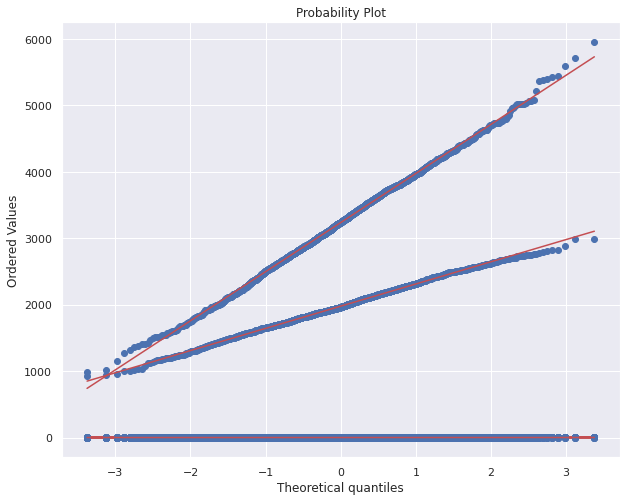

In [ ]:
# Inspect Q-Q plots
for i in normal:
  stats.probplot(df[i], dist="norm", plot=pylab)

Most features are not normally distributed. Therefore non-parametric analysis of variation was performed.

* **Kruskal-Wallis + Episolon Squared test**

In [ ]:
# Print only features in which a moderate, relatively strong, strong or very strong effect size was identified
for i in features:  
  data = [df.loc[ids, i].values for ids in df.groupby('Level').groups.values()]
  H, p = stats.kruskal(*data)
  temp_df = pd.DataFrame().assign(ord=df[i],nom=df['Level'])
  n = len(temp_df)
  esq = H * (n+1) / (n ** 2 -1)
  if esq >.04 and esq < .16:
    print(i + ' Moderate: ', esq)
  if esq < .36 and esq > .16:
    print(i + ' Relatively strong: ', esq)
  if esq > .36 and esq < .64:
    print(i + ' Strong: ', esq)  
  if esq > .64:
    print(i + ' Very strong: ', esq)  

Cohesive Complexity Feature: Mendes Additive Connectives per Token Moderate:  0.0737661614665389
Cohesive Complexity Feature: Mendes All Connectives per Token Moderate:  0.1460926860706718
Cohesive Complexity Feature: Mendes Single-Word Connectives per Token Moderate:  0.1460926860706718
Cohesive Complexity Feature: Mendes Temporal Connectives per Token Moderate:  0.04823147134962388
Dependency Locality Theory: Maximal IC at Finite Verb (higher verb weight) Moderate:  0.040447024911999856
Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight + higher verb weight) Moderate:  0.040340031246174676
Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight) Moderate:  0.05977552931711552
Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight) Moderate:  0.04525825335456753
Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight) Moderate:  0.045559382955237156
Dependency Locality 